In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

In [4]:
mushroom=pd.read_csv("mushrooms.csv")

In [5]:
#EDA
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

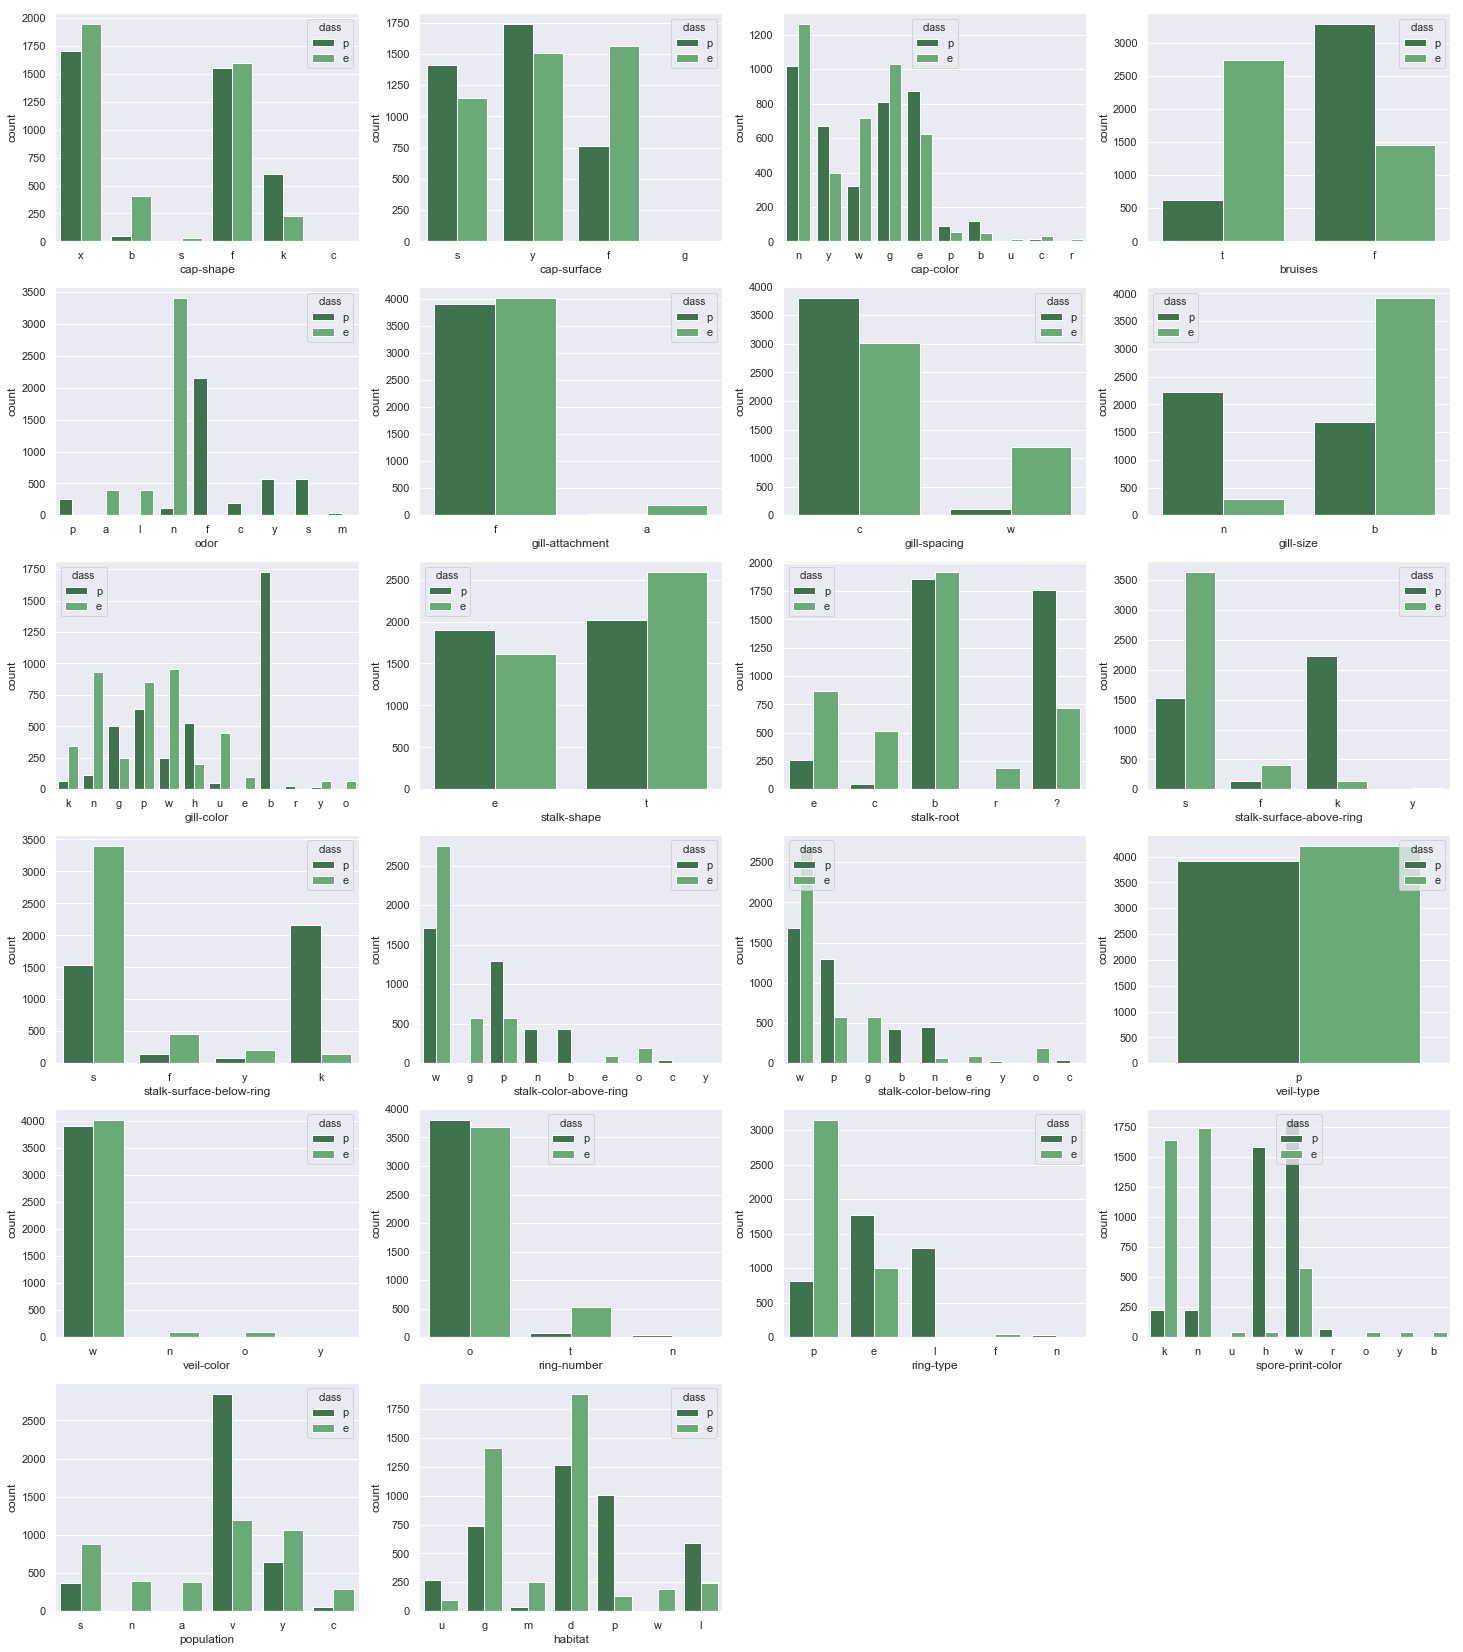

In [8]:
mushcol=mushroom.iloc[:,1:].columns

plt.figure(figsize=(25,21*5))
gs=gridspec.GridSpec(21,4)

for i, col in enumerate(mushroom[mushcol]):
    ax=plt.subplot(gs[i])
    sns.countplot(x=col, hue="class", palette="Greens_d", data=mushroom)

In [9]:
#前処理
mushroom = mushroom[["class", "bruises"]]

In [10]:
mushroom.head()

,class,bruises
0,p,t
1,e,t
2,e,t
3,p,t
4,e,f


In [11]:
mushroomcol=mushroom.columns[0:]
mushroomcol

Index(['class', 'bruises'], dtype='object')

In [12]:
mushroom2=pd.get_dummies(mushroom, columns=mushroomcol,drop_first=True)

In [13]:
mushroom2.head()

,class_p,bruises_t
0,1,1
1,0,1
2,0,1
3,1,1
4,0,0


In [14]:
mushroom2["class_p"].value_counts()

0    4208
1    3916
Name: class_p, dtype: int64

In [15]:
train_set,test_set=train_test_split(mushroom2, test_size=0.2, random_state=42)

In [16]:
#train_
y_train=train_set["class_p"]
x_train=train_set.drop("class_p",axis=1)

In [17]:
#test
y_test=test_set["class_p"]
x_test=test_set.drop("class_p",axis=1)

In [18]:
#モデル学習
Log_model=LogisticRegression()
Log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#予測とモデル評価
y_pred_1=Log_model.predict(x_test)

In [20]:
cnf_matrix=confusion_matrix(y_test,y_pred_1)
cnf_matrix

array([[547, 296],
       [132, 650]], dtype=int64)

In [21]:
y_pred_2=Log_model.predict(x_train)
cnf_matrix_2=confusion_matrix(y_train,y_pred_2)
cnf_matrix_2

array([[2205, 1160],
       [ 492, 2642]], dtype=int64)

In [22]:
accuracy_score(y_train, y_pred_2)

0.7458070472380366

In [23]:
accuracy_score(y_test, y_pred_1)

0.7366153846153846

In [24]:
from sklearn.feature_selection import RFE

In [25]:
mushroom2=pd.get_dummies(mushroom, columns=mushroom.columns[1:], drop_first=True)

In [26]:
mushroom[1:]

,class,bruises
1,e,t
2,e,t
3,p,t
4,e,f
5,e,t
6,e,t
7,e,t
8,p,t
9,e,t
10,e,t
